# French Presidential Election : Tweets (03/02/2017 - 26/02/2017)

This Dataset comes from the Twitter API, these data were collected during 10 minutes every hour, during three weeks. The stream filtered tweets by the mention of the name of some candidates. You can find the dataset here : https://www.kaggle.com/jeanmidev/french-presidential-election

_Let's go to Analyze these data_

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import datetime

## Converting Sqlite database to Pandas dataframe

In [2]:
connection = sqlite3.connect("database.sqlite")
df = pd.read_sql_query("select * from data;", connection)
connection.close()
df.head()

,index,lang,mention_Fillon,mention_Hamon,mention_Le Pen,mention_Macron,mention_Mélenchon,text,timestampms
0,0,fr,1,0,0,0,0,"RT @AllezFillon: Bonjour @jccambadelis, pensez...",1486481509767
1,1,fr,1,0,0,0,0,@Framilon @GeoffroyDidier @FrancoisFillon @enm...,1486481509866
2,2,fr,1,0,0,0,0,RT @PaulAveline: Le Canard Enchaîné révèle que...,1486481509939
3,3,fr,0,1,0,0,0,RT @chirpichirp: @RTenfrancais @FredElNacional...,1486481510001
4,4,fr,0,0,0,0,0,"RT @beaulieu37: Ha ha. La fameuse ""transparenc...",1486481510041


In [3]:
lines = df.shape[0]
print("Number of Tweets : " + str(lines))

Number of Tweets : 1067316


## Parsing Dates

In [4]:
# Disable Warning 'SettingWithCopyWarning'
pd.options.mode.chained_assignment = None
df_tweets = df[["timestampms","mention_Fillon","mention_Hamon",
         "mention_Le Pen","mention_Macron",
         "mention_Mélenchon"]]

df_tweets["datetime"] = pd.to_numeric(df_tweets["timestampms"])
df_tweets["datetime"] = pd.to_datetime(df_tweets["datetime"], unit='ms')

df_tweets['year'] = df_tweets.datetime.dt.year
df_tweets['month'] = df_tweets.datetime.dt.month
df_tweets['day'] = df_tweets.datetime.dt.day

df_tweets["datetime"] = pd.to_datetime(df_tweets[['day', 'month', 'year']])

df_tweets = df_tweets.drop(["timestampms"], axis = 1)
df_tweets = df_tweets[["datetime","mention_Fillon","mention_Hamon",
         "mention_Le Pen","mention_Macron", "mention_Mélenchon"]]
df_tweets.head()

,datetime,mention_Fillon,mention_Hamon,mention_Le Pen,mention_Macron,mention_Mélenchon
0,2017-02-07,1,0,0,0,0
1,2017-02-07,1,0,0,0,0
2,2017-02-07,1,0,0,0,0
3,2017-02-07,0,1,0,0,0
4,2017-02-07,0,0,0,0,0


## Reindexing

In [5]:
df_tweets = df_tweets.set_index('datetime')
# Remove the row of the index name
df_tweets.index.name = None 

# Group by Dates

In [6]:
group_tweets = df_tweets.groupby(df_tweets.index).sum()
group_tweets

,mention_Fillon,mention_Hamon,mention_Le Pen,mention_Macron,mention_Mélenchon
2017-02-03,9063,1586,2001,3575,731
2017-02-04,17873,3406,6143,23855,1520
2017-02-05,17055,9265,12938,19952,6027
2017-02-06,60475,5018,10701,13374,3694
2017-02-07,40861,4027,6906,11048,1605
2017-02-08,25195,3592,6344,10463,1051
2017-02-09,22497,4056,10199,12924,1063
2017-02-10,17653,2639,10035,9894,880
2017-02-11,13544,2968,5048,8020,875
2017-02-12,13013,2980,5064,9055,1281


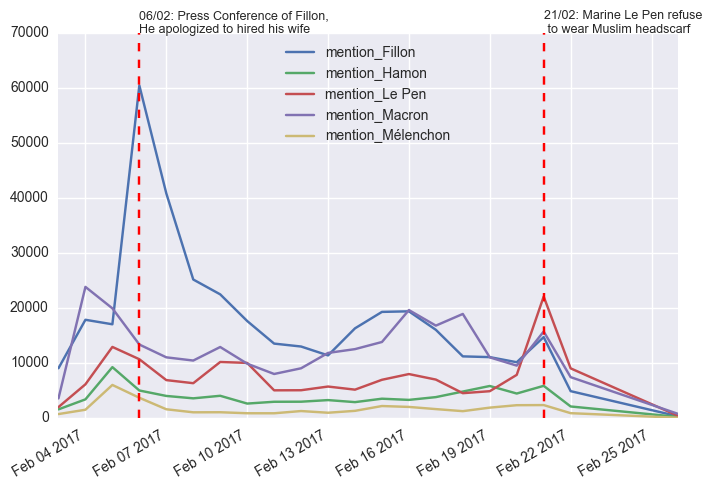

In [7]:
group_tweets.plot()
axes = plt.gca()

plt.axvline(x= datetime.datetime(year = 2017, month = 2, day = 6), linestyle="dashed", color="r")
plt.text(datetime.datetime(year = 2017, month = 2, day = 6), y = axes.get_ylim()[1],
         s="06/02: Press Conference of Fillon,\nHe apologized to hired his wife", fontsize=9)

plt.axvline(x= datetime.datetime(year = 2017, month = 2, day = 21), linestyle="dashed", color="r")
plt.text(datetime.datetime(year = 2017, month = 2, day = 21), y = axes.get_ylim()[1],
         s="21/02: Marine Le Pen refuse \n to wear Muslim headscarf", fontsize=9)
         
plt.show()